# The Joy of Painting with Bob Ross Analyzed

Bob Ross was an American painter and television host of the instructional program The Joy of Painting which ran on PBS and affilated stations from 1983 - 1994. Over the course of his 11 year run Ross painting hundreds of landscape paintings using the alla prima technique and helped make oil painting approachable for a broad audience. This report will attempt to analyze the themes present in his work over that time span.

### Importing Pandas & Matplotlib

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Dataset

In [10]:
data = pd.read_csv('data/elements-by-episode.csv')

### Examining the Header Data

In [11]:
data.head(5)

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### Examining the Shape of the Data

In [12]:
data.shape

(403, 69)

### Examining Column names

In [13]:
data.columns

Index(['EPISODE', 'TITLE', 'APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH',
       'BOAT', 'BRIDGE', 'BUILDING', 'BUSHES', 'CABIN', 'CACTUS',
       'CIRCLE_FRAME', 'CIRRUS', 'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS',
       'DECIDUOUS', 'DIANE_ANDRE', 'DOCK', 'DOUBLE_OVAL_FRAME', 'FARM',
       'FENCE', 'FIRE', 'FLORIDA_FRAME', 'FLOWERS', 'FOG', 'FRAMED', 'GRASS',
       'GUEST', 'HALF_CIRCLE_FRAME', 'HALF_OVAL_FRAME', 'HILLS', 'LAKE',
       'LAKES', 'LIGHTHOUSE', 'MILL', 'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT',
       'OCEAN', 'OVAL_FRAME', 'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT',
       'RECTANGLE_3D_FRAME', 'RECTANGULAR_FRAME', 'RIVER', 'ROCKS',
       'SEASHELL_FRAME', 'SNOW', 'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STEVE_ROSS',
       'STRUCTURE', 'SUN', 'TOMB_FRAME', 'TREE', 'TREES', 'TRIPLE_FRAME',
       'WATERFALL', 'WAVES', 'WINDMILL', 'WINDOW_FRAME', 'WINTER',
       'WOOD_FRAMED'],
      dtype='object')

### Examining Data types

In [14]:
data.dtypes

EPISODE            object
TITLE              object
APPLE_FRAME         int64
AURORA_BOREALIS     int64
BARN                int64
                    ...  
WAVES               int64
WINDMILL            int64
WINDOW_FRAME        int64
WINTER              int64
WOOD_FRAMED         int64
Length: 69, dtype: object

## What I know:
Each row is made up of season and episode numbers. Painting titles, elements, themes, frame type for each painting are broken out by column. 1 for true, 0 for false. Much like a paintbrush fresh out of mineral spirits, the data is very clean so I will move on to what I hope to learn from the data.

## What I don't know:
1. Which elements are most commonly used?
2. Does the complexity of Ross' paintings change over time?
3. How do the titles reflect on the themes contained in the paintings?
4. What sort of frames are used? 
5. How are elements of the paintings used together?

## Let's focus on the subject matter of the paintings.


In [18]:
elements = data.drop(['EPISODE', 'TITLE', 'APPLE_FRAME', 'CIRCLE_FRAME', 'DOUBLE_OVAL_FRAME', 'FRAMED',\
                      'FLORIDA_FRAME', 'HALF_CIRCLE_FRAME', 'HALF_OVAL_FRAME', 'OVAL_FRAME', 'RECTANGULAR_FRAME',\
                      'RECTANGLE_3D_FRAME', 'SEASHELL_FRAME', 'SPLIT_FRAME', 'TOMB_FRAME', 'TRIPLE_FRAME',\
                      'WINDOW_FRAME', 'WOOD_FRAMED', 'STEVE_ROSS', 'DIANE_ANDRE'], axis=1)

## Number of times each element is featured.

In [19]:
elements.sum(axis = 0).sort_values(ascending=False)

TREE               361
TREES              337
DECIDUOUS          227
CONIFER            212
CLOUDS             179
MOUNTAIN           160
LAKE               143
GRASS              142
RIVER              126
BUSHES             120
SNOWY_MOUNTAIN     109
MOUNTAINS           99
CUMULUS             86
STRUCTURE           85
ROCKS               77
SNOW                75
CABIN               69
WINTER              69
PATH                49
SUN                 40
WATERFALL           39
OCEAN               36
WAVES               34
CIRRUS              28
BEACH               27
FENCE               24
FOG                 23
GUEST               22
HILLS               18
BARN                17
FLOWERS             12
NIGHT               11
PALM_TREES           9
CLIFF                8
BRIDGE               7
CACTUS               4
PORTRAIT             3
MOON                 3
BOAT                 2
AURORA_BOREALIS      2
MILL                 2
PERSON               1
FARM                 1
FIRE       

## Plotting Themes

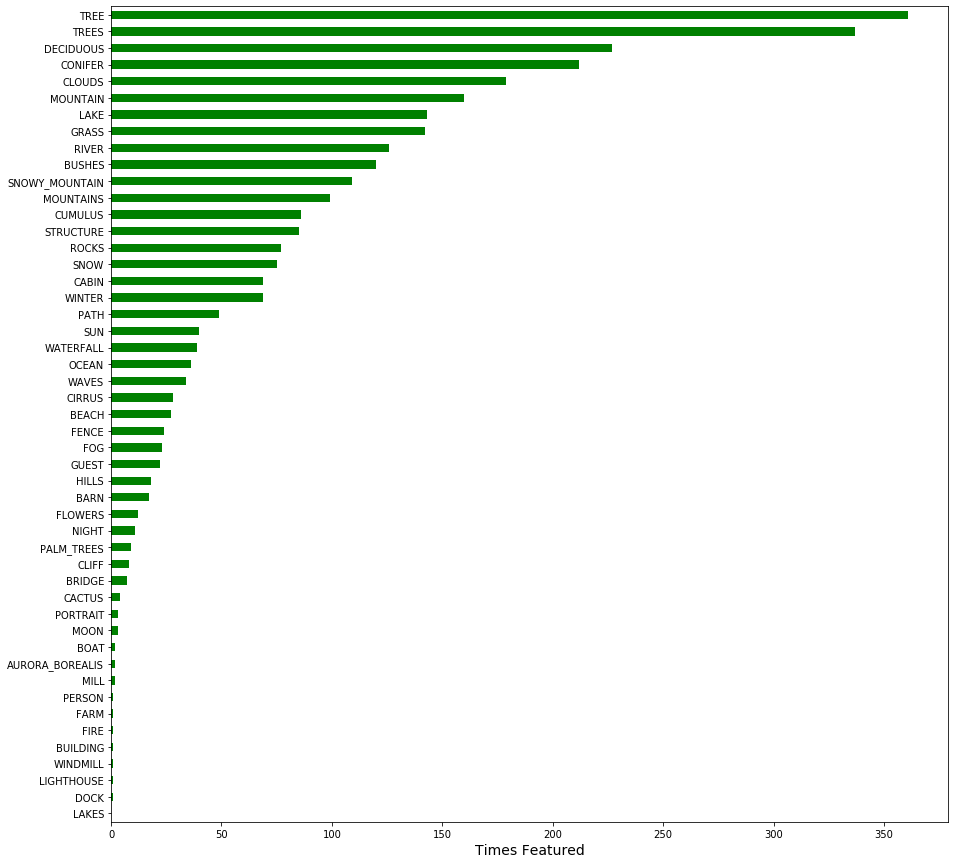

In [20]:
elements.sum(axis = 0).sort_values(ascending=True).plot(kind='barh', figsize=(15,15), color='green')
plt.xlabel('Times Featured', fontsize=14);

### Complexity of Paintings
Over the years it's common for artists to simplify and refine their work. I wanted to see if the same could be said of Ross' paintings over the course of his show's run. To do this I'll be summing the total number of elements per painting.

Below: an early painting of Claude Monet compared to one of his final paintings.
![Monet early work vs. Monet late work](assets/monet.jpg "Monet early work vs. Monet late work")

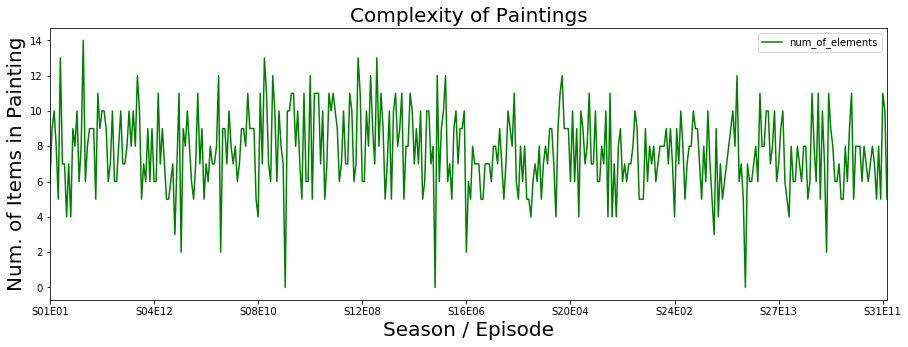

In [21]:
data['num_of_elements'] = elements.sum(axis=1)
line_graph = data.plot.line(x='EPISODE', y='num_of_elements', figsize=(15,5), color='green')
plt.title('Complexity of Paintings', fontsize=20);
plt.xlabel('Season / Episode', fontsize=20)
plt.ylabel('Num. of Items in Painting', fontsize=20);

Text(0.5, 0, 'Number of Items in Painting')

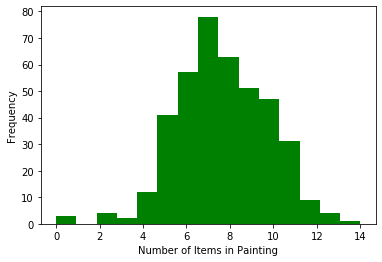

In [23]:
data.num_of_elements.plot(kind='hist', bins=15, color='green')
plt.xlabel ('Number of Items in Painting')

Ross' paintings appear to remain consistent over the course of The Joy of Painting, most of them having around seven elements. Curiously, according to the data there are some paintings that appear to have zero elements. Certainly he didn't end a show with a blank canvas - that means there's probably some errors in my dataset. Let's take a look at the episode titles.

In [24]:
data[['EPISODE','TITLE','num_of_elements']].sort_values(by='num_of_elements').head(3)

,EPISODE,TITLE,num_of_elements
113,S09E10,"""COUNTRY CHARM""",0
334,S26E10,"""PURPLE MOUNTAIN RANGE""",0
185,S15E04,"""PEACEFUL REFLECTIONS""",0


## Paintings with Zero num_of_elements

![Bob Ross](assets/0-elements-paintings.jpg "Blank canvases?")

Trees, mountains, lakes, clouds - even two rare things for Bob to paint, a rainbow and a building. The datasource mentioned all of the painting information was gathered from scraping an e-commerce website so is likely due to human error.

## Words Frequently Used in Titles

The Joy of Painting episode and painting titles are mostly short, literal and nature-related. Bob Ross spent 20 years prior to becoming a painter in the U.S. Air Force stationed in Alaska. The scenery there obviously made an impression on him with "winter" being the second most used word in his titles. One surprise here is that he doesn't title more paintings describing trees considering how frequently they are the subject matter. "Forest" is used used in titles only 10 times throughout the show's run.

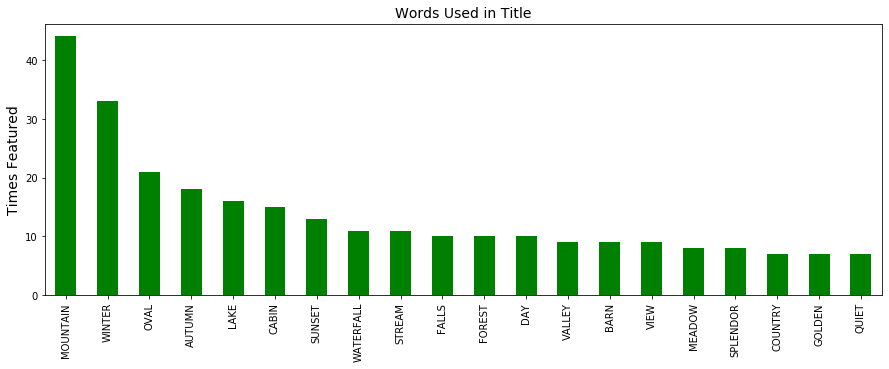

In [25]:
data['TITLE'] = data['TITLE'].str.strip('"');
ep_titles = data['TITLE'].str.get_dummies(sep=' ').sum().sort_values(ascending=False).head(25)
ep_titles = ep_titles.drop(['OF', 'THE', 'A', 'IN', 'AT'])
ep_titles.plot(kind='bar', figsize=(15,5), color='green')
plt.ylabel('Times Featured', fontsize=14)
plt.title('Words Used in Title', fontsize=14);

## Plotting Frames

A number of paintings were either taped off to create a shape on the canvas (Florida, Apple) or the canvas itself was a non-rectangle shape. Very unique considering the traditional nature of Ross' paintings.

In [26]:
frames = data.drop(['num_of_elements','EPISODE','TITLE','FRAMED','AURORA_BOREALIS','BARN','BEACH','BOAT','BRIDGE',\
                    'BUILDING','BUSHES','CABIN','CACTUS','CIRRUS','CLIFF','CLOUDS','CONIFER','CUMULUS',\
                    'DECIDUOUS','DIANE_ANDRE','DOCK','FARM','FENCE','FIRE','FLOWERS','FOG','GRASS','GUEST',\
                    'HILLS','LAKE','LAKES','LIGHTHOUSE','MILL','MOON','MOUNTAIN','MOUNTAINS','NIGHT',
                    'OCEAN','PALM_TREES','PATH','PERSON','PORTRAIT','RIVER','ROCKS','SNOW','SNOWY_MOUNTAIN',\
                    'STEVE_ROSS','STRUCTURE','SUN','TREE','TREES','WATERFALL','WAVES','WINDMILL','WINTER'], axis = 1)

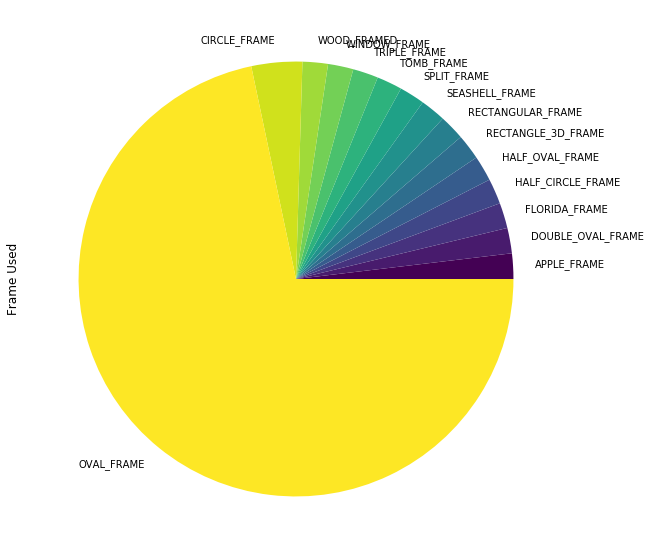

In [27]:
frames.sum(axis = 0).sort_values(ascending=True).plot(kind='pie', figsize=(10,10), colormap='viridis')
plt.ylabel('Frame Used', fontsize=12);

## Joint Probabilities. 

Finally I wanted to take a look at how often you could expect elements of the paintings to be featured together.

In [28]:
tree = data[data['TREE']== 1].shape[0] / data.shape[0]
cloud = data[data['CLOUDS']== 1].shape[0] / data.shape[0]
mountain = data[data['MOUNTAIN']== 1].shape[0] / data.shape[0]
tree_wo_trees = data[(data['TREE']== 1) != (data['TREES'] == 1)].shape[0] / data.shape[0]
tree_and_trees = data[(data['TREE']== 1) & (data['TREES'] == 1)].shape[0] / data.shape[0]

tree_w_mountain = data[(data['TREE']== 1) & (data['MOUNTAIN'] == 1)].shape[0] / data.shape[0]
cactus_w_cloud = data[(data['CACTUS']== 1) & (data['CLOUDS'] == 1)].shape[0] / data.shape[0]
print("Percentage of total paintings featuring at least one tree: " "{0:.2f}%".format(tree * 100))
print("Percentage of total paintings featuring one tree only: " "{0:.2f}%".format(tree_wo_trees * 100))
print("Percentage of total paintings featuring multiple trees: " "{0:.2f}%".format(tree_and_trees * 100))
print("Percentage of total paintings featuring at least 1 tree w/ mountains: " "{0:.2f}%".format(tree_w_mountain * 100))
print("Percentage of total paintings featuring cactus & clouds: " "{0:.2f}%".format(cactus_w_cloud * 100))




Percentage of total paintings featuring at least one tree: 89.58%
Percentage of total paintings featuring one tree only: 5.96%
Percentage of total paintings featuring multiple trees: 83.62%
Percentage of total paintings featuring at least 1 tree w/ mountains: 38.71%
Percentage of total paintings featuring cactus & clouds: 0.99%


## Next Steps

Continue research into the most quintessential Bob Ross painting.

# Additional Reading

- [FiveThirtyEight's Bob Ross Dataset](https://www.example.com)
- [Bob Ross on YouTube](https://www.youtube.com/user/BobRossInc)
- [Wikipedia entry for Wet-on-Wet (Alla Prima) Painting Technique](https://en.wikipedia.org/wiki/Wet-on-wet)

![Bob Ross](assets/bob-ross-bye-bye.gif "Bob Ross")